In [110]:
import pandas as pd
from datetime import datetime 
import seaborn as sns #Visualization
import matplotlib.pyplot as plt
import numpy as np

In [111]:
df = pd.read_csv("Migraines.csv")
mask = (df["Metric"]=="Migraine")&(df["Value"]==1)
df_clean = df[mask].drop(columns="Metric")
df_clean.reset_index(inplace=True,drop=True)
# df_clean["Date"] = pd.to_datetime(df_clean['Date'])
df_clean["Date"] = pd.to_datetime(df_clean['Date']).dt.tz_localize(None)

In [112]:
df_weather = pd.read_csv("weather_data.csv")
df_weather["datetime"] = pd.to_datetime(df_weather['datetime'])
df_weather.keys()

Index(['name', 'datetime', 'tempmax', 'tempmin', 'temp', 'feelslikemax',
       'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob',
       'precipcover', 'preciptype', 'snow', 'snowdepth', 'windgust',
       'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility',
       'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'sunrise',
       'sunset', 'moonphase', 'conditions', 'description', 'icon', 'stations'],
      dtype='object')

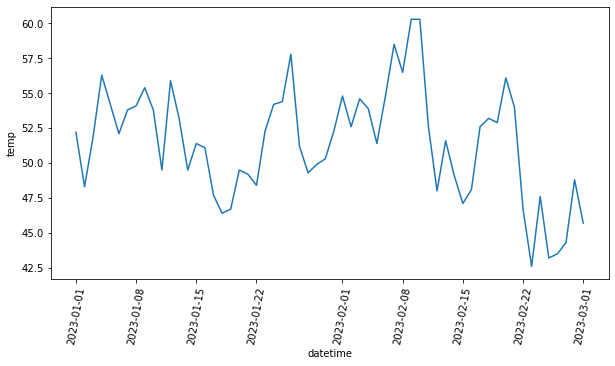

In [113]:
# df_weather['temp']
fig,ax=plt.subplots(1,1,figsize=(10,5))
sns.lineplot(data=df_weather,x="datetime",y="temp")
plt.xticks(rotation = 80);

In [116]:
target = np.zeros(len(df_weather))
for i in range(len(df_weather)):
    for j in range(len(df_clean)):
        if (df_weather['datetime'][i] == df_clean["Date"][j]):
            target[i]=1
df_weather['migraine'] = np.asarray(target,int)
df_weather["temp_dt"]=np.append(0,df_draft['temp'].values[1:]-df_draft['temp'].values[:-1])

In [289]:
# asdf = df_weather['datetime'][df_weather['migraine']==1]
# # df_weather["dt_since_last"] = np.append(0,asdf.values[1:]-asdf.values[:-1])
# qwer = (asdf.values[1:]-asdf.values[:-1])
# # qwer/1e11

In [290]:
df_draft = df_weather[['datetime','temp','humidity','precip','temp_dt','migraine']]

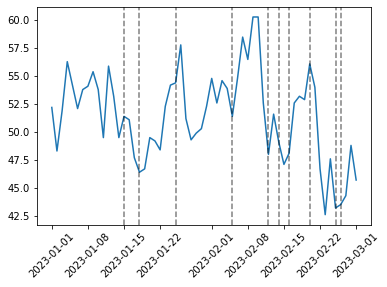

In [291]:
# Temperature
plt.plot(df_draft["datetime"],df_draft["temp"])
[plt.axvline(i,color='k',ls='dashed',alpha=0.5) for i in df_draft[mig_mask]['datetime'].values]
plt.xticks(rotation=45);

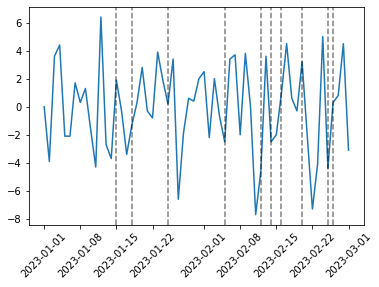

In [292]:
# change in temperature
plt.plot(df_draft["datetime"],df_draft["temp_dt"])
[plt.axvline(i,color='k',ls='dashed',alpha=0.5) for i in df_draft[mig_mask]['datetime'].values]
plt.xticks(rotation=45);

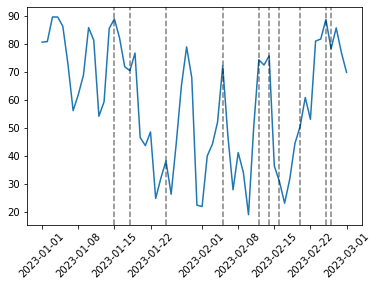

In [293]:
# humidity?
plt.plot(df_draft["datetime"],df_draft["humidity"])
[plt.axvline(i,color='k',ls='dashed',alpha=0.5) for i in df_draft[mig_mask]['datetime'].values]
plt.xticks(rotation=45);

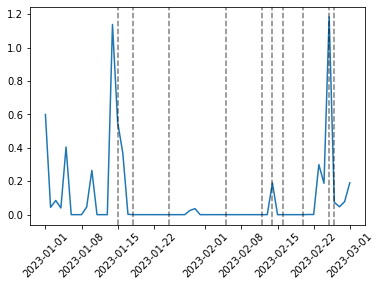

In [294]:
# precip
plt.plot(df_draft["datetime"],df_draft["precip"])
[plt.axvline(i,color='k',ls='dashed',alpha=0.5) for i in df_draft[mig_mask]['datetime'].values]
plt.xticks(rotation=45);

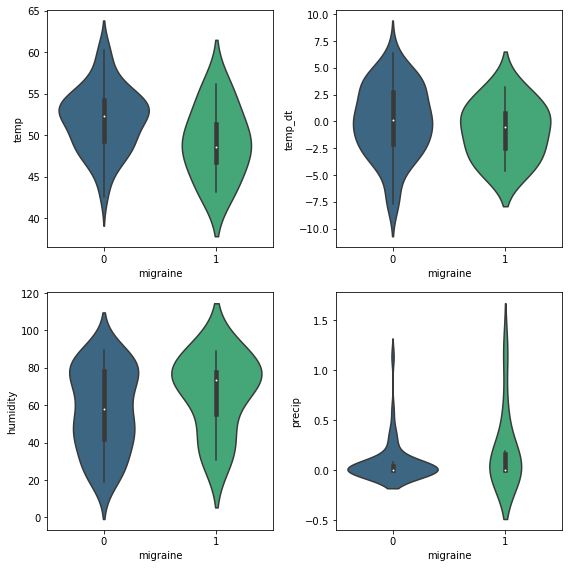

In [214]:
fig,ax = plt.subplots(2,2,figsize=(8,8))
sns.violinplot(x='migraine',y='temp',data=df_draft,palette='viridis',ax=ax[0,0])
sns.violinplot(x='migraine',y='temp_dt',data=df_draft,palette='viridis',ax=ax[0,1])
sns.violinplot(x='migraine',y='humidity',data=df_draft,palette='viridis',ax=ax[1,0])
sns.violinplot(x='migraine',y='precip',data=df_draft,palette='viridis',ax=ax[1,1])
plt.tight_layout()
# sns.violinplot(x='sex', y='bill_length_mm',data=test,palette='viridis')

In [263]:
X = df_draft.drop(columns=["migraine","datetime"])
y = df_draft['migraine']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.90, random_state=0)

from sklearn.preprocessing import StandardScaler
ss_train = StandardScaler()
X_train = ss_train.fit_transform(X_train)

ss_test = StandardScaler()
X_test = ss_test.fit_transform(X_test)

In [264]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
R2 = clf.score(X_train,y_train) 
# predictions = model.predict(X_test)


In [265]:
# y_test,y_pred

In [266]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
accuracy = accuracy_score(y_pred, y_test)
precision = precision_score(y_pred, y_test)
recall = recall_score(y_pred, y_test)
print(accuracy),print(precision),print(recall)

0.7592592592592593
0.25
0.2222222222222222


(None, None, None)

In [269]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()
accuracy =  (TP + TN) / (TP + FP + TN + FN)
print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)
print("accuracy = ",accuracy)

# plt.imshow(confusion_matrix(y_test, y_pred))

True Positive(TP)  =  2
False Positive(FP) =  7
True Negative(TN)  =  39
False Negative(FN) =  6
accuracy =  0.7592592592592593


In [155]:
# df_draft#[df_draft['migraine'].values]
# mig_mask = np.asarray(df_draft['migraine'],bool)
# df_draft[mig_mask]['datetime']
# df_draft[mig_mask]['datetime'].values[0]

### Correlation with day of week?

<AxesSubplot: xlabel='dow', ylabel='migraine'>

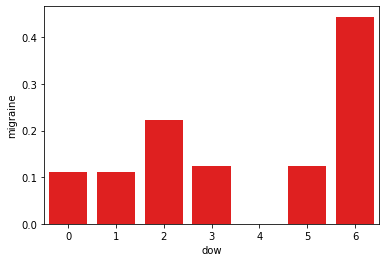

In [331]:
dow_df = df_draft.groupby(df_draft["datetime"].dt.weekday).agg({"migraine":"mean"})
dow_df = dow_df.reset_index()
dow_df['dow'] = dow_df["datetime"]
dow_df.drop(columns="datetime")
# dow_df['migraine'].plot()
# 
sns.barplot(x="dow",y='migraine',data=dow_df,color='r') #6 means sunday, 0 means monday
# I get the most migraines on Sunday's

In [371]:
from scipy.fft import fft, fftfreq
x,y = df_draft[["datetime","temp"]].values.T
# Number of sample points
N = len(x)
# sample spacing
T = 1 #day
yf = fft(y)
xf = fftfreq(N,T)[:N//2]
len(xf),len(yf)

(30, 60)

In [593]:
# fig, ax = plt.subplots(1,2,figsize=(11,6))
# ax[0].plot(x,y)
# # ax[0].set_xlabel(rotate=0)
# # ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, ha='right');
# ax[0].tick_params(axis='x', labelrotation=45)

# ax[1].plot(np.log10(xf), np.abs(yf[0:N//2])**2)# 2.0/N * np.abs(yf[0:N//2]))
# ax[1].set_yscale("log")
# # ax[1].set_xscale("log")
# 2*np.pi/pow(10,-0.65)

In [594]:
np.asarray((df_draft["datetime"]-df_draft["datetime"][0]),float)/1e9/60/24/60

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51.,
       52., 53., 54., 55., 56., 57., 58., 59.])

0.03333333333333333

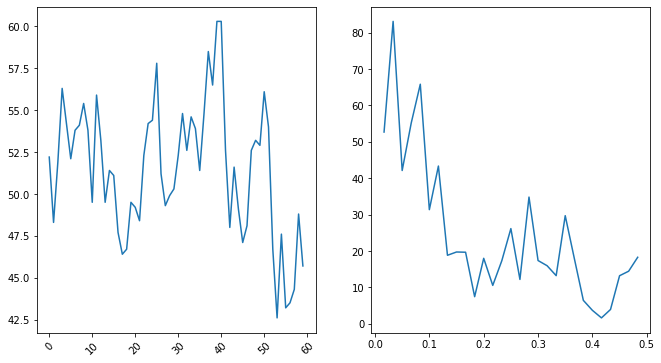

In [595]:
from scipy.fft import fft, fftfreq
time_series = np.asarray((df_draft["datetime"]-df_draft["datetime"][0]),float)/1e9/60/24/60
y = df_draft["temp"].values
N = len(x)
timestep=time_series[1]-time_series[0]
fig, ax = plt.subplots(1,2,figsize=(11,6))
ax[0].plot(time_series,y)
ax[0].tick_params(axis='x', labelrotation=45)

xf = fftfreq(N, timestep)[:N//2]
yf = np.abs(fft(y))[:N//2]
ax[1].plot(xf[1:],yf[1:])
1/30

Resonant period is 5.000 min
Resonant frequency should be 0.200 1/min


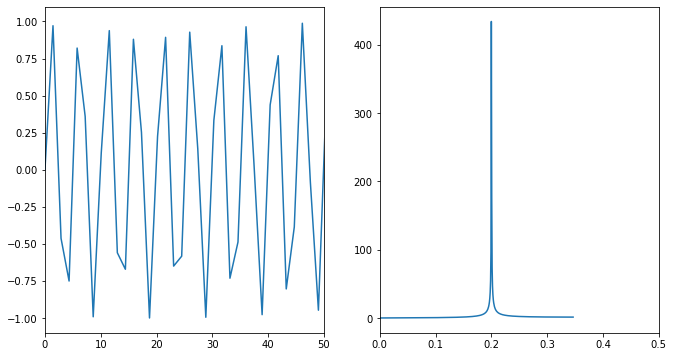

In [596]:
N = 1000
min_time,max_time = 0,60*24 # minutes in a day
time_series = np.linspace(min_time,max_time,N) #tracking time series of 1 day
period = 5 #sinusoid has period of 5 minutes
timestep=(max_time-min_time)/N  #sample spacing in units of minutes
fig, ax = plt.subplots(1,2,figsize=(11,6))
sinusoid = np.sin(2*np.pi/period*time_series)
ax[0].plot(time_series,sinusoid)
ax[0].set_xlim(0,50)

xf = fftfreq(N, timestep)[:N//2]
yf = np.abs(fft(sinusoid))[:N//2]
ax[1].plot(xf,yf)
ax[1].set_xlim(0,0.5)
print("Resonant period is {:.3f} min".format(period))
print("Resonant frequency should be {:.3f} 1/min".format(1/period))